In [1]:
import networkx as nx

In [2]:
graph = nx.MultiDiGraph() # Multi because sometimes there are multiple synapses from neuron A to B

In [3]:
root_id_a = 1283971983272897
root_id_b = 1857298751987243
graph.add_node(root_id_a)

In [4]:
graph.add_edge(root_id_a, root_id_b, weight=123)
graph.add_edge(root_id_a, root_id_b, weight=456)
graph.add_edge(root_id_b, root_id_b, weight=1)

0

In [5]:
print("Total number of nodes: ", int(graph.number_of_nodes()))
print("Total number of edges: ", int(graph.number_of_edges()))
print("Degree for all nodes: ", dict(graph.degree()))
print("Total number of self-loops: ", int(nx.number_of_selfloops(graph)))
print("List of all nodes with self-loops: ", list(nx.nodes_with_selfloops(graph)))
print("List of all nodes we can go to in a single step from node A: ",list(graph.neighbors(root_id_a)))

Total number of nodes:  2
Total number of edges:  3
Degree for all nodes:  {1283971983272897: 2, 1857298751987243: 4}
Total number of self-loops:  1
List of all nodes with self-loops:  [1857298751987243]
List of all nodes we can go to in a single step from node A:  [1857298751987243]


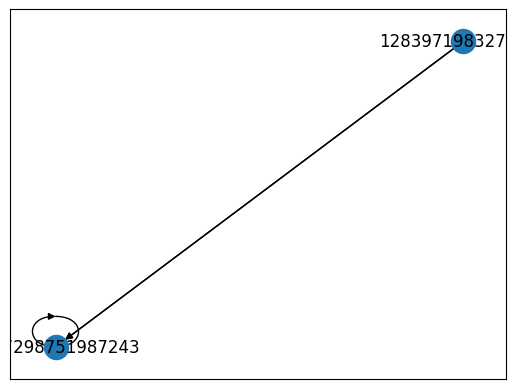

In [6]:
nx.draw_networkx(graph)

In [7]:
graph.edges

OutMultiEdgeView([(1283971983272897, 1857298751987243, 0), (1283971983272897, 1857298751987243, 1), (1857298751987243, 1857298751987243, 0)])

In [8]:
graph.adj

MultiAdjacencyView({1283971983272897: {1857298751987243: {0: {'weight': 123}, 1: {'weight': 456}}}, 1857298751987243: {1857298751987243: {0: {'weight': 1}}}})

In [9]:
for u, v, data in graph.edges.data():
    print(u, v, data)

1283971983272897 1857298751987243 {'weight': 123}
1283971983272897 1857298751987243 {'weight': 456}
1857298751987243 1857298751987243 {'weight': 1}


In [10]:
for u, v, weight in graph.edges.data("weight"):
    print(f"{u} to {v}: weight={weight}")

1283971983272897 to 1857298751987243: weight=123
1283971983272897 to 1857298751987243: weight=456
1857298751987243 to 1857298751987243: weight=1


In [11]:
nx.DiGraph(graph)[u][v]

{'weight': 1}

# Convert MultiDiGraph to DiGraph

In [12]:
single_graph = nx.DiGraph()
attrs_to_incr = ["weight"]

for u, v, data in graph.edges.data():
    if single_graph.has_edge(u, v):
        # Edge exists; increment all numeric types
        for key, value in data.items():
            if key in attrs_to_incr: # isinstance(value, Number)
                single_graph[u][v][key] += value
    else:
        # Edge doesn't exist; add it with same data
        single_graph.add_edge(u, v, **data)

for u, v, data in single_graph.edges.data():
    print(u, v, data)
            

1283971983272897 1857298751987243 {'weight': 579}
1857298751987243 1857298751987243 {'weight': 1}


# Saving and reading from files

In [13]:
from networkx.readwrite.gml import read_gml, write_gml

In [14]:
# Write to file
save_file = "/Users/chase/Desktop/test_graph.gml"
write_gml(graph, save_file)

In [15]:
# Read from file
graph_from_file = read_gml(save_file)

In [16]:
for u, v, data in graph_from_file.edges.data():
    print(f"{u} to {v}: {data}")

1283971983272897 to 1857298751987243: {'weight': 123}
1283971983272897 to 1857298751987243: {'weight': 456}
1857298751987243 to 1857298751987243: {'weight': 1}


In [17]:
graph_from_file

In [18]:
# They are equal
edge_match = nx.algorithms.isomorphism.numerical_multiedge_match("weight", 0)
nx.is_isomorphic(graph, graph_from_file, edge_match=edge_match)

True